In [3]:
#!pip install torchvision

In [37]:
from torchvision.datasets import MNIST
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader
import numpy as np
import torch
from torch.utils.data.sampler import SubsetRandomSampler

import warnings
from functools import reduce
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [39]:
flatten = lambda x: ToTensor()(x).view(28**2)

dset_train = MNIST("./", train=True,  transform=flatten, download=True)
dset_test  = MNIST("./", train=False, transform=flatten)

classes=[0, 1, 4, 9]

In [40]:
def stratified_sampler(labels):
    """
        Sampler that only picks datapoints corresponding to the specified classes
    """
    (indices,) = np.where(reduce(lambda x, y: x | y, [labels.numpy() == i for i in classes]))
    indices = torch.from_numpy(indices)
    return SubsetRandomSampler(indices)

In [41]:
batch_size = 64
eval_batch_size = 100

# data loaders
train_loader = DataLoader(dset_train, batch_size=batch_size,
                          sampler=stratified_sampler(dset_train.train_labels))
test_loader  = DataLoader(dset_test, batch_size=eval_batch_size,
                          sampler=stratified_sampler(dset_test.test_labels))

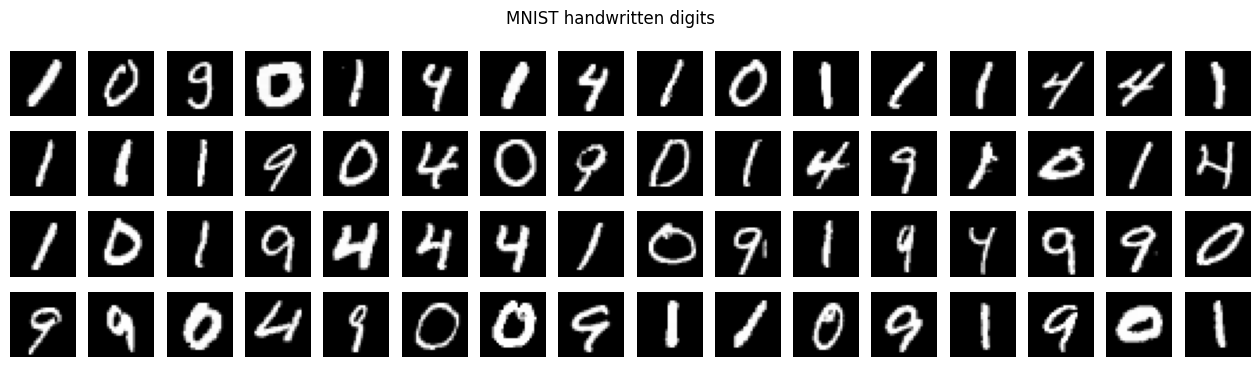

In [42]:
#plot a few MNIST examples
f, axarr = plt.subplots(4, 16, figsize=(16, 4))

# Load a batch of images into memory
images, labels = next(iter(train_loader))

for i, ax in enumerate(axarr.flat):
    ax.imshow(images[i].view(28, 28), cmap="binary_r")
    ax.axis('off')

plt.suptitle('MNIST handwritten digits')
plt.show()